<a href="https://colab.research.google.com/github/Swayamprakashpatel/Principle-Component-Regression/blob/main/PCR_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('/content/Data.csv')  # Replace 'your_dataset.csv' with your actual dataset filename

# Separate the features (X) and the target variable (y)
X = data.iloc[:, 1:-2].values
y = data.iloc[:, -2].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform Principal Component Analysis (PCA)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Determine the optimal number of components to use
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.99) + 1  # Set the threshold for explained variance

# Retain the top components based on the explained variance threshold
X_train_selected = X_train_pca[:, :num_components]
X_test_selected = X_test_pca[:, :num_components]

# Train the linear regression model on the selected components
regressor = LinearRegression()
regressor.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_selected)

# Evaluate the model
# (You can use various metrics like mean squared error, R-squared, etc.)
mse = np.mean((y_pred - y_test) ** 2)
r_squared = regressor.score(X_test_selected, y_test)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 1.2351999144590837
R-squared: 0.9938240004277046


In [25]:
print(cumulative_variance)

[0.95154258 0.99877523 0.99971463 0.99994227 0.99997776 0.99999145
 0.99999704 0.99999816 0.99999872 0.99999905 0.99999926 0.99999944
 0.9999996  0.99999971 0.99999981 0.99999987 0.99999993 0.99999998
 1.         1.        ]


In [11]:
print(y)

[ 5  5  5  5  5 15 15 15 15 15 25 25 25 25 25 35 35 35 35 35 45 45 45 45
 45]


In [12]:
new_data = pd.read_csv('/content/validation data.csv')  # Replace 'new_input_data.csv' with the actual filename of your new input data

# Preprocess the new input data
new_X = new_data.values
new_X_scaled = scaler.transform(new_X)

# Perform PCA on the preprocessed input data
new_X_pca = pca.transform(new_X_scaled)

# Select the top principal components
new_X_selected = new_X_pca[:, :num_components]

# Make predictions using the trained regressor
new_predictions = regressor.predict(new_X_selected)

# Print the predictions
print(new_predictions)

[ 9.31137432 50.52800906  7.52784349 48.27487904]


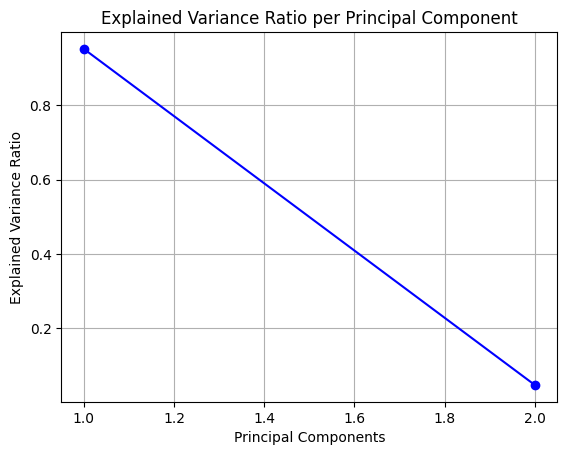

In [14]:
# Plot the explained variance ratio
plt.plot(np.arange(1, num_components + 1), explained_variance[:num_components], 'bo-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid(True)
plt.show()


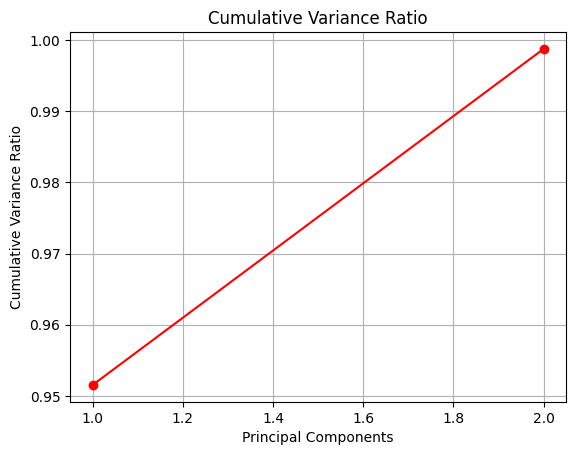

In [15]:
# Plot the cumulative variance ratio
plt.plot(np.arange(1, num_components + 1), cumulative_variance[:num_components], 'ro-')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio')
plt.grid(True)
plt.show()


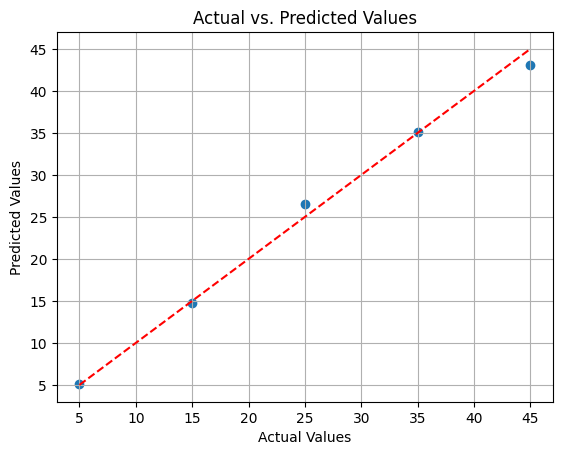

In [16]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


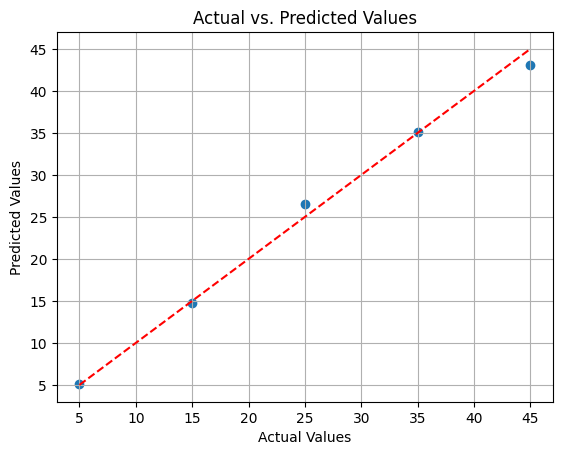

In [17]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


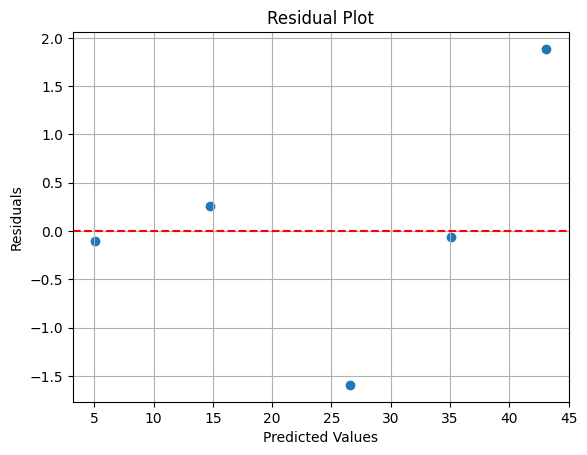

In [18]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


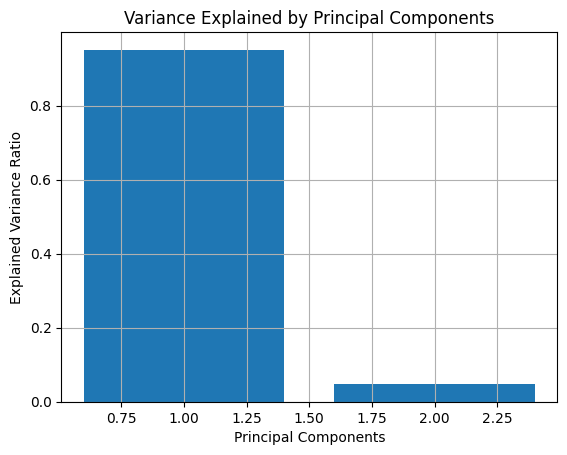

In [19]:
# Variance explained by principal components
plt.bar(np.arange(1, num_components + 1), explained_variance[:num_components], align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.grid(True)
plt.show()


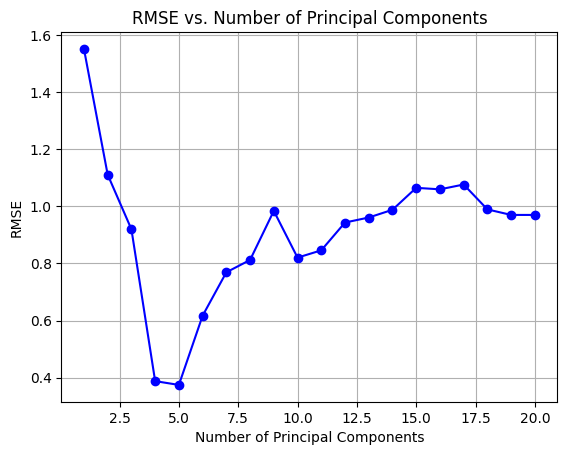

In [26]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Wine Quality dataset
# Load your dataset
data = pd.read_csv('/content/Data.csv')  # Replace 'your_dataset.csv' with your actual dataset filename

# Separate the features (X) and the target variable (y)
X = data.iloc[:, 1:-2].values
y = data.iloc[:, -2].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCR with different numbers of principal components
num_components = np.arange(1, min(X_train.shape[0], X_train.shape[1]) + 1)
rmse_scores = []

for n in num_components:
    # Perform PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the linear regression model
    regressor = LinearRegression()
    regressor.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test_pca)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plot the RMSE vs. Number of Principal Components
plt.plot(num_components, rmse_scores, 'bo-')
plt.xlabel('Number of Principal Components')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Principal Components')
plt.grid(True)
plt.show()
